Diamonds Dataset
Source : https://www.kaggle.com/shivam2503/diamonds
price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import sklearn

Importing and reading the file

In [2]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Shape of the data

In [4]:
data.shape

(53940, 10)

Checking for NULL values


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
selected_columns = ['carat' , 'depth' , 'table' , 'price' , 'x' , 'y' , 'z']
subset_data = data[selected_columns]
subset_data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


Describing the data in terms of Bivariate Measures specifically correlation and heatmap

In [8]:
correlation = subset_data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


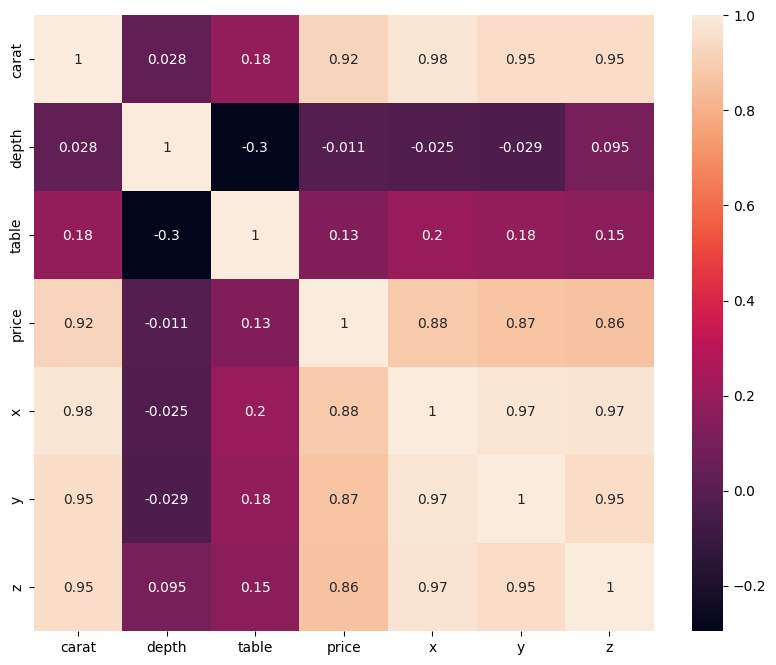

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

Finding all unique values for all categorical attributes

In [10]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Charting out the box plot for bivariate and graphical summaries between the categorical value and price 

<Axes: title={'center': 'price'}, xlabel='cut'>

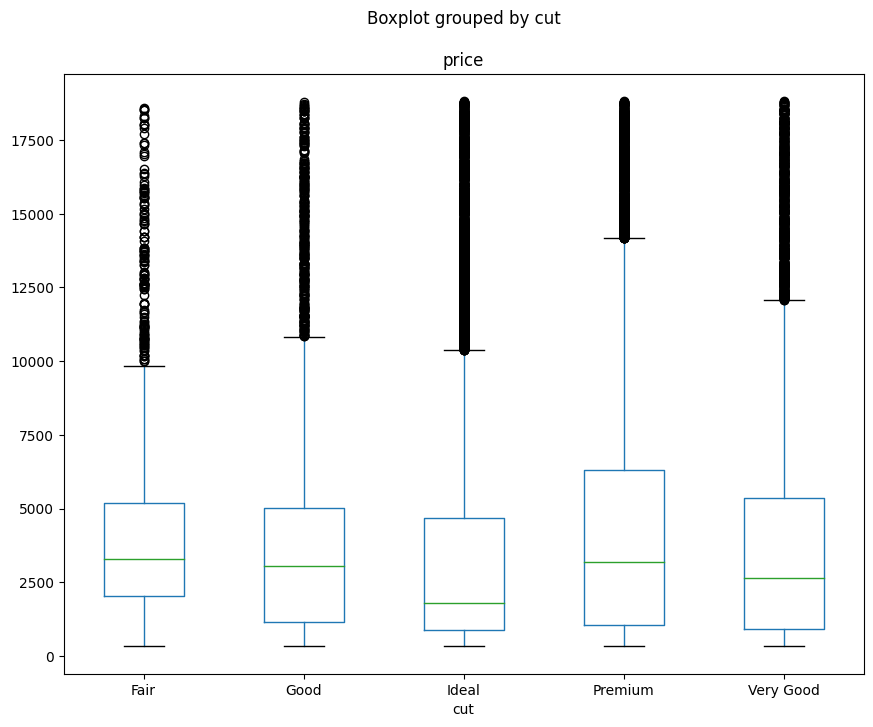

In [14]:
data.boxplot(by = 'cut', column=['price'], grid = False, figsize=(10, 8))

<Axes: title={'center': 'price'}, xlabel='color'>

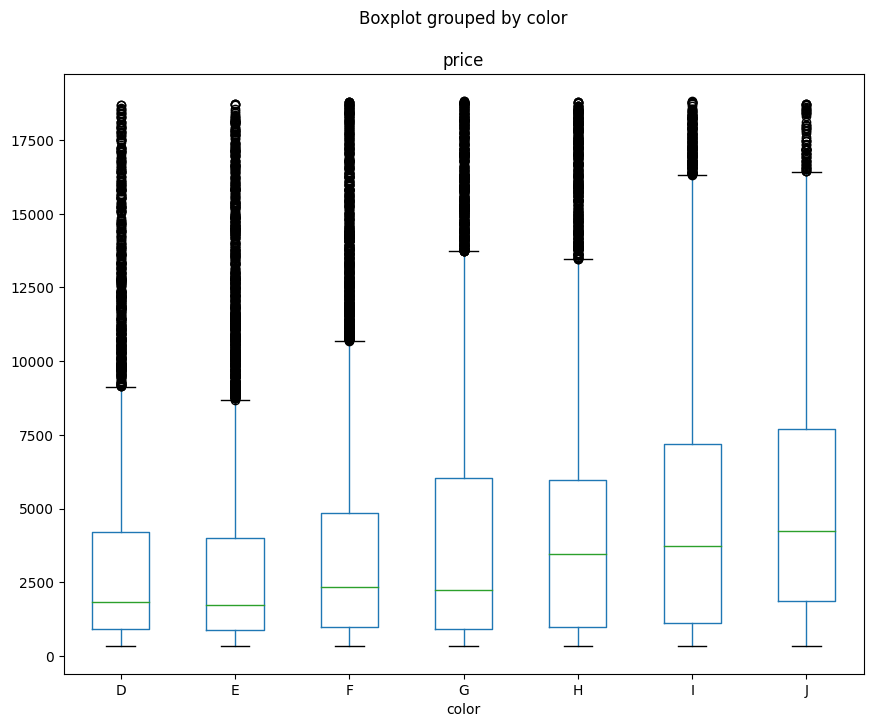

In [15]:
data.boxplot(by = 'color', column = ['price'], grid = False, figsize=(10, 8))

<Axes: title={'center': 'price'}, xlabel='clarity'>

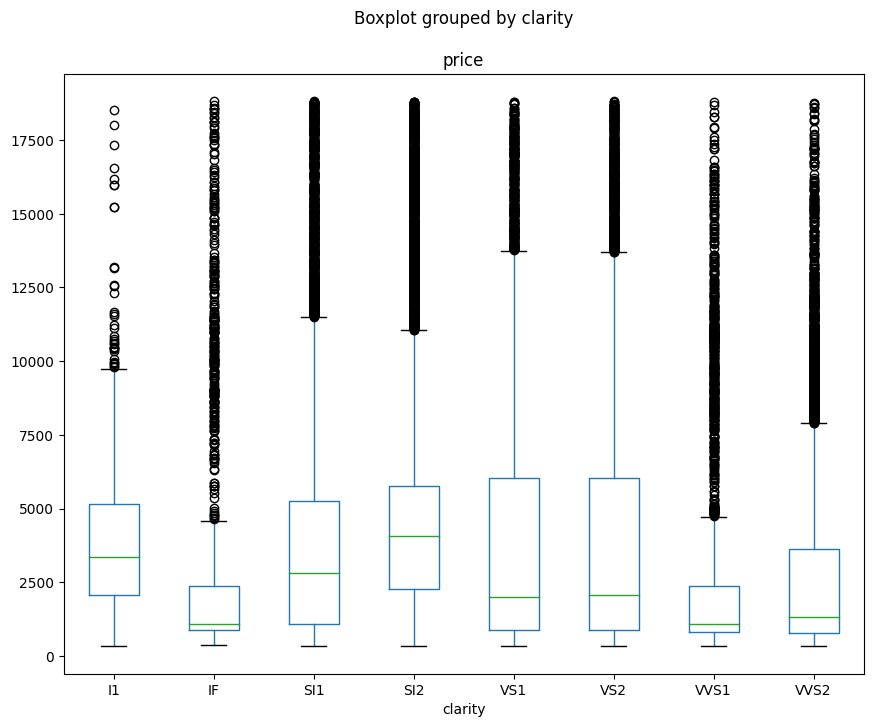

In [16]:
data.boxplot(by = 'clarity', column = ['price'], grid = False, figsize=(10, 8) )

Scatter plot to graph the numeric features vs price 

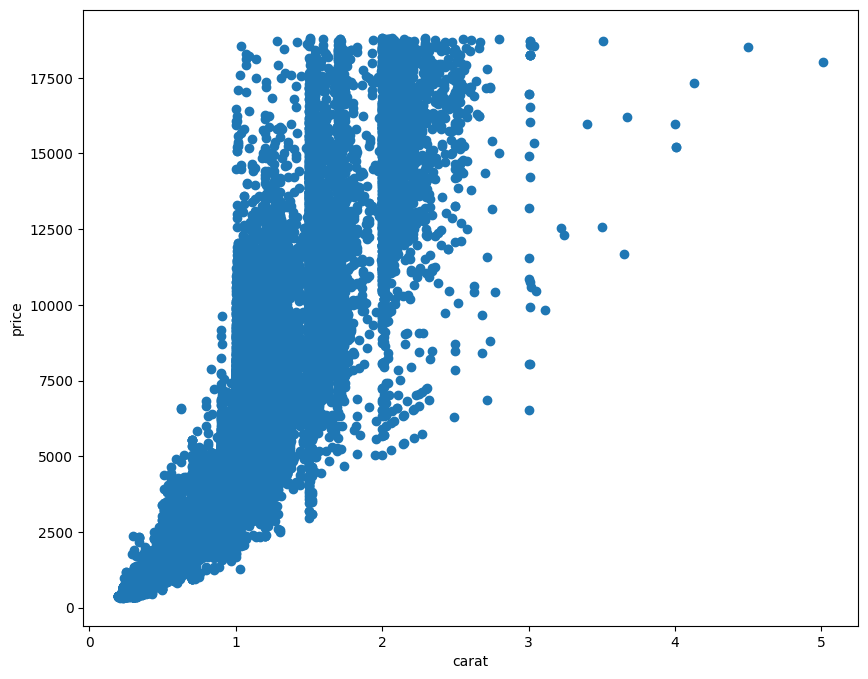

In [17]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['carat'], data['price'])

plt.xlabel('carat')
plt.ylabel('price')
plt.show()

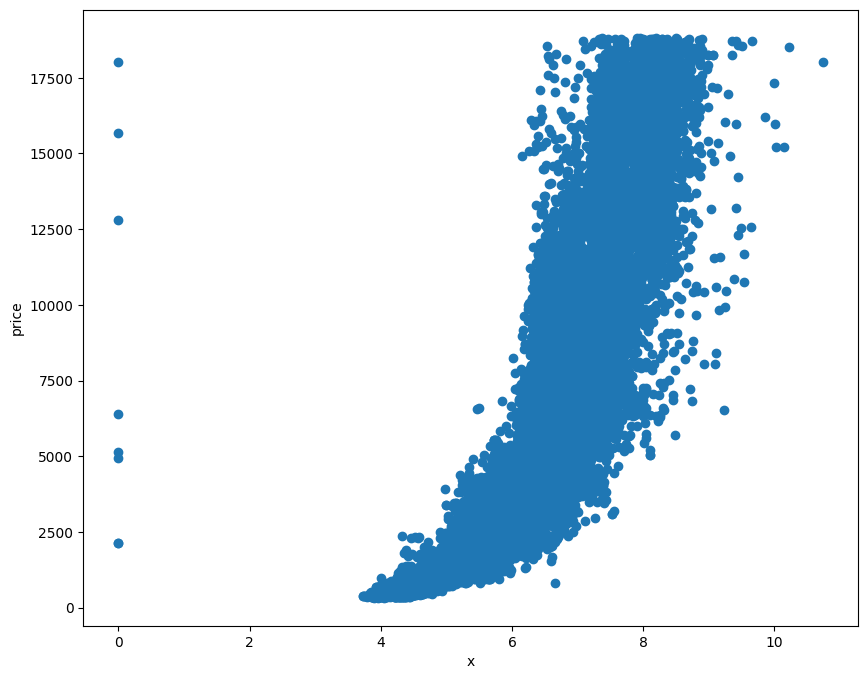

In [18]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['x'], data['price'])
plt.xlabel('x')
plt.ylabel('price')
plt.show()

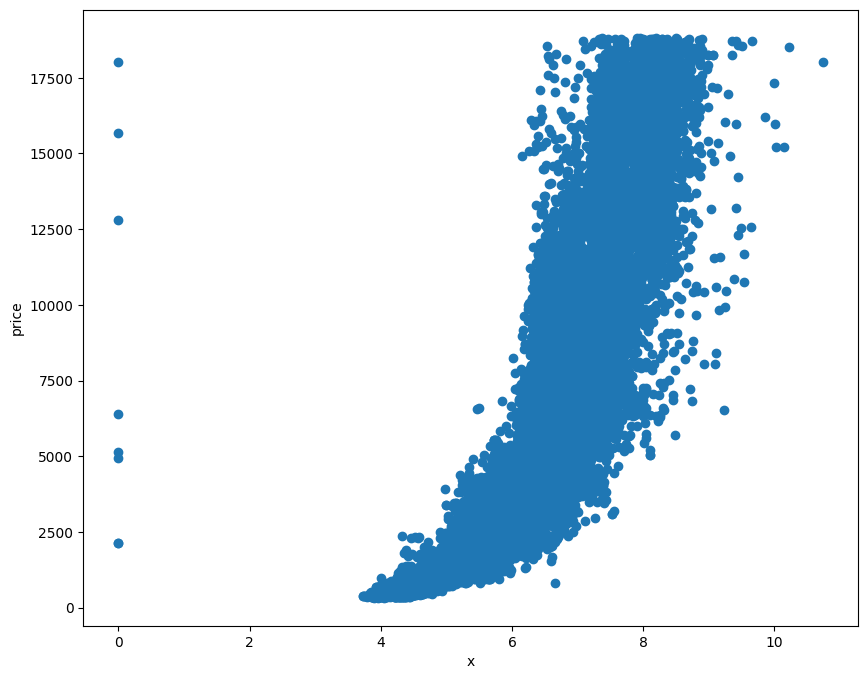

In [19]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['x'], data['price'])
plt.xlabel('x')
plt.ylabel('price')
plt.show()

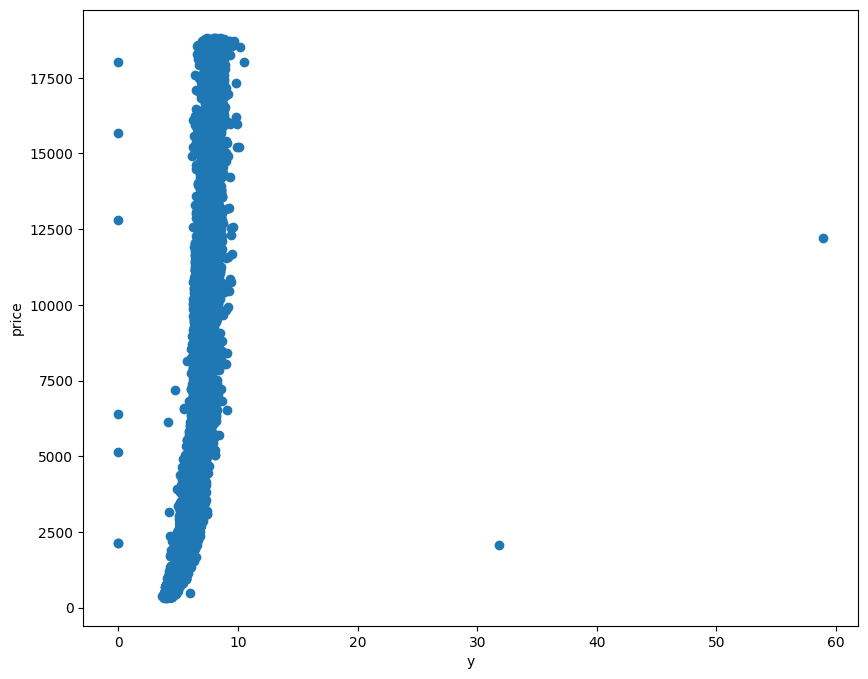

In [20]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['y'], data['price'])
plt.xlabel('y')
plt.ylabel('price')
plt.show()

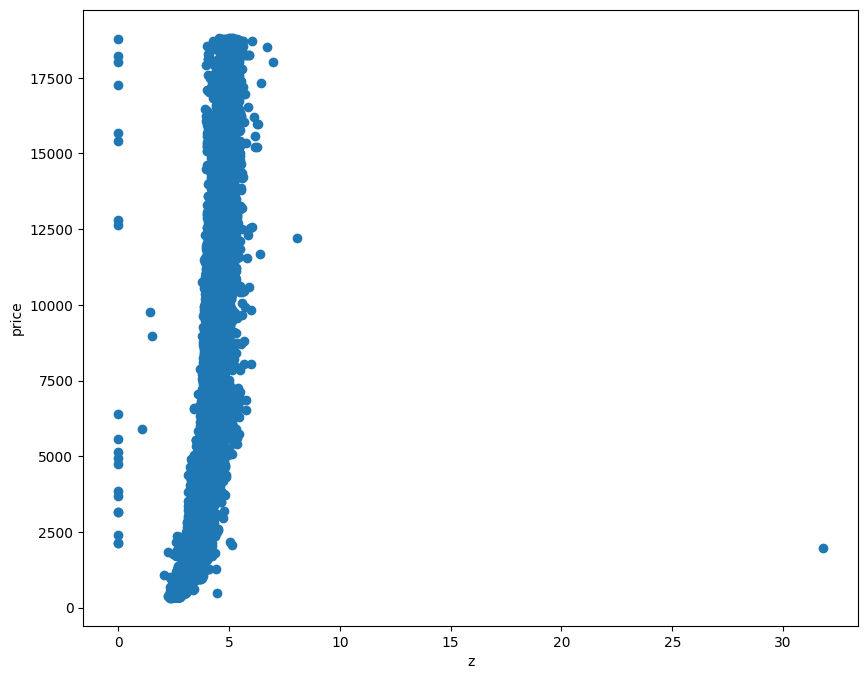

In [21]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['z'], data['price'])

plt.xlabel("z")
plt.ylabel("price")

plt.show()

Converting the the Categorical value into numerical one with higher ranking and low ranking

In [22]:
clarity_dict = {"IF" : 7, "VVS1": 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2" : 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


The rest can be converted to 0 and 1 since there is no value/order to it. We would use label encoder ideally, but since it is multiple attributes to encode we use dummies 

In [23]:
data = pd.get_dummies(data, columns =['cut', 'color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,False,False,True,False,False,False,True,False,False,False,False,False
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,False,False,False,True,False,False,True,False,False,False,False,False
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,False,True,False,False,False,False,True,False,False,False,False,False
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,False,False,False,True,False,False,False,False,False,False,True,False
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,False,True,False,False,False,False,False,False,False,False,False,True


Univariate summmary of the numerical features and we will need to scale the data

In [24]:
numeric_features = ['carat', 'table', 'depth', 'x', 'y', 'z']

numeric_df = data[numeric_features]
numeric_df.describe()

,carat,table,depth,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457184,61.749405,5.731157,5.734526,3.538734
std,0.474011,2.234491,1.432621,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,61.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,61.800000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,62.500000,6.540000,6.540000,4.040000
max,5.010000,95.000000,79.000000,10.740000,58.900000,31.800000


Importing the proper sci-kit learn libraries to perform scaling, training, testing and evaluation of data 

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Creating a function for Linear Regression Model fit on the data

In [26]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression: ")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

Creating a function for Lasso Regression Model fit on the data

In [27]:
from sklearn.linear_model import Lasso

def lasso_model(x_train, y_train):
    print("Lasso Regression : ")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

Creating a function for Ridge Regression Model fit on the data

In [28]:
from sklearn.linear_model import Ridge

def ridge_model(x_train, y_train):
    print("Ridge Regression : ")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

Creating a function for Sochastic Gradient Descent Regression Model fit on the data

In [29]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    print("SGD Regression : ")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

Creating a function for MLP Regressor Neural Network to fit the data. 3 Hidden layers, with 12 neurons each.

In [30]:
from sklearn.neural_network import MLPRegressor

def mlp_model(x_train, y_train):
    mlp_regression = MLPRegressor(activation='relu', hidden_layer_sizes={12, 12, 12}, solver='lbfgs', verbose = True, max_iter= 20000)
    mlp_regression.fit(x_train, y_train)
    return mlp_regression

Creating a Function for building, training and evaluating the model by using the train test split method where X is all variables but the median value and Y is target name = price. The function preprocesses the data using standard scaler, trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values.

In [32]:
def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)

    Y = data[target_name]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state =0)

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)

    df_y = pd.DataFrame({'y_pred' : y_pred,'y_test' : y_test})
    print(df_y.sample(10))
  

    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }


Utilizing the build and train model function to predict and score the lasso model on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

In [33]:
linear_regression = build_and_train_model(data, 'price', linear_model)

Linear Regression: 
Training Score :  0.9098968595504041
Testing Score :  0.9125789565476534
             y_pred  y_test
7450    5848.395651    4233
49788   3538.395651    2162
23521  11623.895651   11526
49757   2167.395651    2159
22038   -368.104349     628
47206   2496.395651    1838
20266   9901.662342    8690
31150    470.395651     755
44154   1413.395651    1563
22530  10140.395651   10571


In [34]:
lasso_regression = build_and_train_model(data, 'price', lasso_model)

Lasso Regression : 
Training Score :  0.9099008418586947
Testing Score :  0.9125701890225874
             y_pred  y_test
28095   -286.303934     663
4908    4812.028772    3724
32985   1292.436139     812
43747   1271.867247    1438
3635    3719.796330    3431
25276  10509.669928   13919
14053   -296.922469     605
18331   6545.762598    7458
32289    268.741743     453
12004   5709.309632    5147


In [35]:
ridge_regression = build_and_train_model(data, 'price', ridge_model)

Ridge Regression : 
Training Score :  0.9099057339042314
Testing Score :  0.9126091873660964
            y_pred  y_test
49314   731.948148     540
40205  -257.444818    1122
21939  9271.025951   10012
38654   779.255426    1040
2931   4692.740749    3290
1089   3482.828943    2911
17620  8222.716070    7094
11167  5613.392256    4949
47158  1894.700521    1833
16656  6259.595009    6660


In [36]:
mlp_regression = build_and_train_model(data, 'price', mlp_model)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          253     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56935D+07    |proj g|=  5.92475D+03

At iterate    1    f=  1.93759D+06    |proj g|=  2.44643D+04
  ys=-4.153E+05  -gs= 1.259E+06 BFGS update SKIPPED

At iterate    2    f=  1.07919D+06    |proj g|=  2.22023D+04

At iterate    3    f=  7.85945D+05    |proj g|=  8.44664D+03

At iterate    4    f=  7.18995D+05    |proj g|=  6.82766D+03

At iterate    5    f=  5.97540D+05    |proj g|=  2.76594D+03

At iterate    6    f=  5.67081D+05    |proj g|=  2.92025D+03

At iterate    7    f=  5.16917D+05    |proj g|=  2.98850D+03

At iterate    8    f=  4.75291D+05    |proj g|=  4.45342D+03

At iterate    9    f=  4.42206D+05    |proj g|=  3.11836D+03

At iterate   10    f=  4.29086D+05    |proj g|=  3.09024D+03

At iterate   11    f=  4.15710D+05    |proj g|=  2.14202D+03

At iterate   12    f=  3.99749D+05  